## Usage notes
This toolkit works in the following order:

- Set up the input data
- Create model (SM, MOSM, CSM, SM-LMC, CG)
- Make an estimation of the model parameters using BNSE+SM
- Train the model parameters
- Set the prediction range
- Do a prediction

For example:
```
import mogptk

x, y = get_your_data()

data = mogptk.Data()
data.add(x, y)

mosm = mogptk.MOSM(data, Q=3)
mosm.init_params()
mosm.train()

mosm.set_prediction_range(0, 0.0, 5.0, n=200)
x_pred, mu_pred, var_pred = mosm.predict()
```

In [1]:
# import library if it is not installed
import sys
sys.path.insert(0, '../')

import mogptk
import numpy as np

%reload_ext autoreload
%autoreload 2

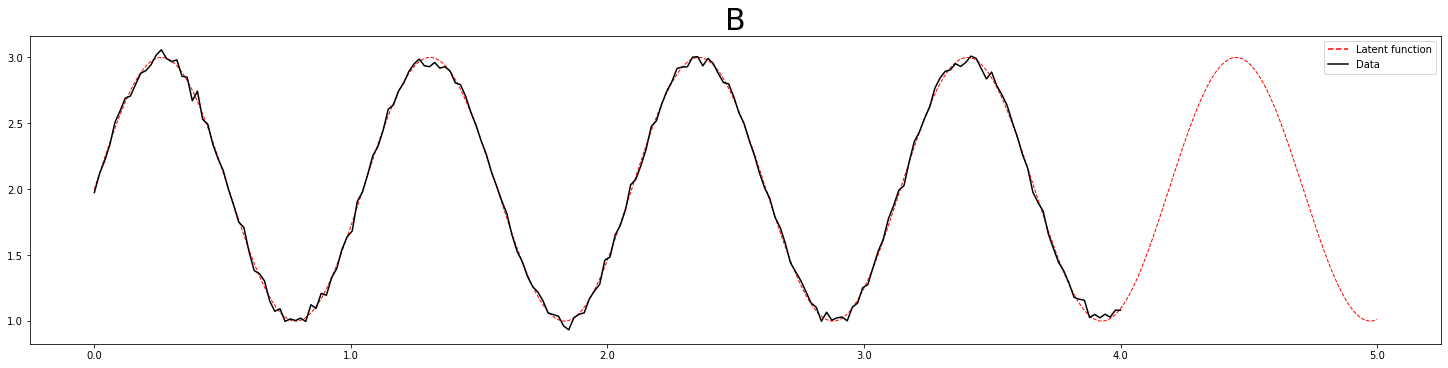

In [2]:
#data = mogptk.Data()
#data.load_csv('data/jura.csv', ['X', 'Y'], ['Cd'])#, 'Cu'])
#data.remove_range('Cd', start=2.0, end=None)
#data.remove_randomly('Cd', pct=0.90)

#data.add_function(lambda x: np.sin(6*x[:,0]) + np.cos(6*x[:,1]), n=200, start=[0.0,0.0], end=[4.0,4.0])
data = mogptk.LoadFunction(lambda x: np.sin(6*x[:,0])+2, n=200, start=0.0, end=4.0, var=0.03, name='B')
#data.add_function(lambda x: np.sin(6*x)+2 - np.sin(4*x), n=20, start=0.0, end=4.0, var=0.03, name='C')
#data.remove_range('A', start=2.0, end=None)

data.set_pred_range(0.0, 5.0, n=200)

data.plot()

In [ ]:
data.transform(mogptk.TransformLog)
data.plot()

In [ ]:
sm = mogptk.SM(data, Q=3)
display(sm.get_params())

In [ ]:
sm.estimate_params()
display(sm.get_params())
sm.plot_psd()

In [ ]:
sm.train(method='BFGS')
display(sm.get_params())
sm.plot_psd()

In [ ]:
sm.predict(plot=True)

## MOSM

In [3]:
mosm = mogptk.MOSM(data, Q=3)
mosm.print_params()

Instructions for updating:
Colocations handled automatically by placer.


,magnitude,mean,variance,delay,phase,noise
Q,,,,,,
0,[-0.5531055465810226],[[0.6351196348262746]],[[0.28130360430972834]],[[0.0]],[0.0],NaN
1,[2.174841932080435],[[-0.7981285456006927]],[[0.006302181624697201]],[[0.0]],[0.0],NaN
2,[0.6899270382986198],[[-0.8832817190642657]],[[0.15538630579217538]],[[0.0]],[0.0],NaN
3,NaN,NaN,NaN,NaN,NaN,[0.32886951652368956]


In [4]:
mosm.estimate_params(method='SM')
mosm.print_params()

Instructions for updating:
Use tf.cast instead.
         Current function value: -394.805009
         Iterations: 82
         Function evaluations: 194
         Gradient evaluations: 183
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -394.805009
  Number of iterations: 82
  Number of functions evaluations: 194
Done in 0.0 minutes


,magnitude,mean,variance,delay,phase,noise
Q,,,,,,
0,[1.0],[[6.001994785213097]],[[2.3581581661410697e-06]],[[0.0]],[0.0],NaN
1,[1.0],[[6.283185307185431e-06]],[[2.0000000102140517e-06]],[[0.0]],[0.0],NaN
2,[1.0],[[0.0005328546151717408]],[[2e-06]],[[0.0]],[0.0],NaN
3,NaN,NaN,NaN,NaN,NaN,[0.016814740775803513]


In [5]:
mosm.train()
mosm.print_params()

Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -394.116957
  Number of iterations: 11
  Number of functions evaluations: 19
Done in 0.0 minutes


,magnitude,mean,variance,delay,phase,noise
Q,,,,,,
0,[7.772525066796059],[[6.002292117587858]],[[6.007563517060181e-06]],[[0.0]],[0.0],NaN
1,[11.926622363151568],[[6.283185212323484e-06]],[[1.1335918335364022e-05]],[[0.0]],[0.0],NaN
2,[11.9266023834374],[[0.0005327731284600153]],[[1.133556544218858e-05]],[[0.0]],[0.0],NaN
3,NaN,NaN,NaN,NaN,NaN,[0.00094007071619222]


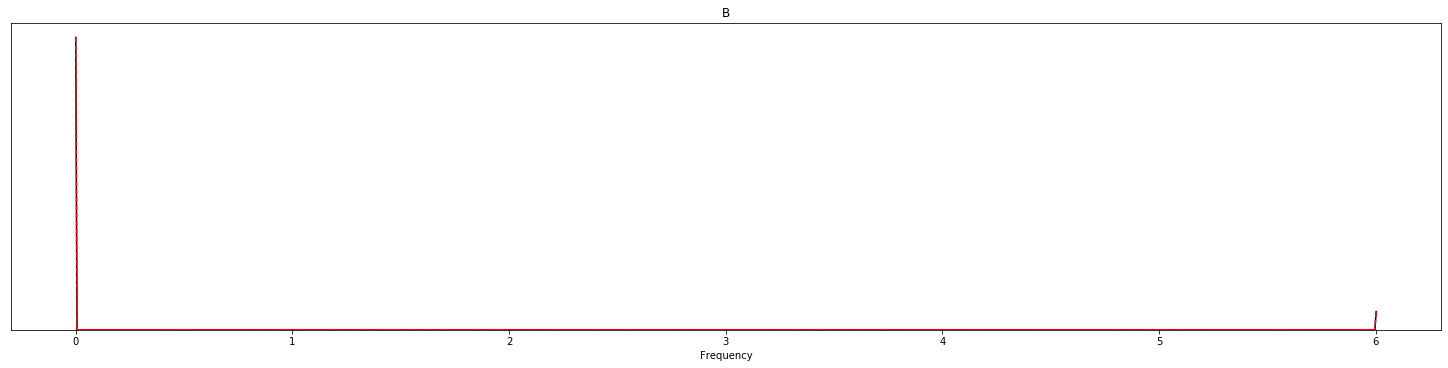

In [6]:
mosm.plot()

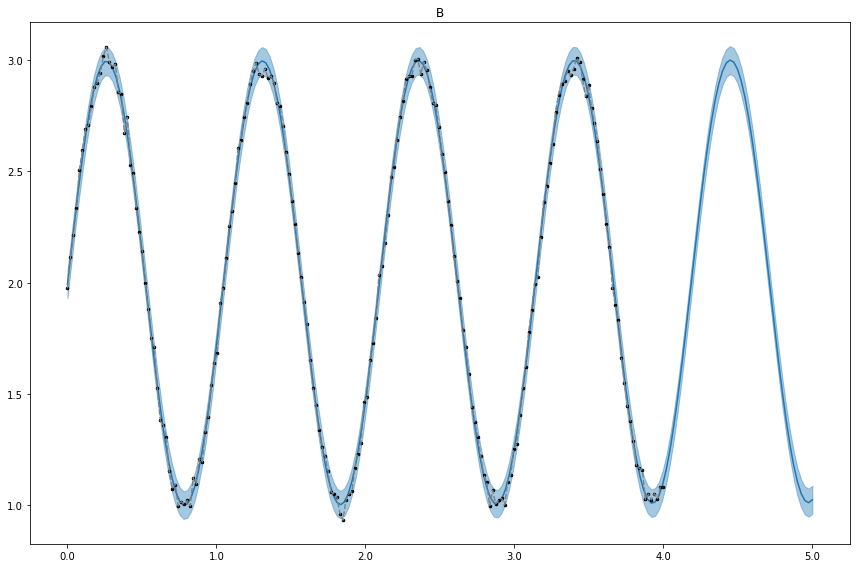

In [7]:
mosm.predict(plot=True)

### Saving and loading

In [19]:
mosm.save_params('mosm')
mosm.print_params()

,magnitude,mean,variance,delay,phase,noise
Q,,,,,,
0,[7.772525066796059],[[6.002292117587858]],[[6.007563517060181e-06]],[[0.0]],[0.0],NaN
1,[11.926622363151568],[[6.283185212323484e-06]],[[1.1335918335364022e-05]],[[0.0]],[0.0],NaN
2,[11.9266023834374],[[0.0005327731284600153]],[[1.133556544218858e-05]],[[0.0]],[0.0],NaN
3,NaN,NaN,NaN,NaN,NaN,[0.00094007071619222]


In [20]:
mosm2 = mogptk.MOSM(data, Q=3)
mosm2.load_params('mosm')
mosm2.print_params()

,magnitude,mean,variance,delay,phase,noise
Q,,,,,,
0,[7.772525066796059],[[6.002292117587858]],[[6.007563517060181e-06]],[[0.0]],[0.0],NaN
1,[11.926622363151568],[[6.283185212323484e-06]],[[1.1335918335364022e-05]],[[0.0]],[0.0],NaN
2,[11.9266023834374],[[0.0005327731284600153]],[[1.133556544218858e-05]],[[0.0]],[0.0],NaN
3,NaN,NaN,NaN,NaN,NaN,[0.00094007071619222]


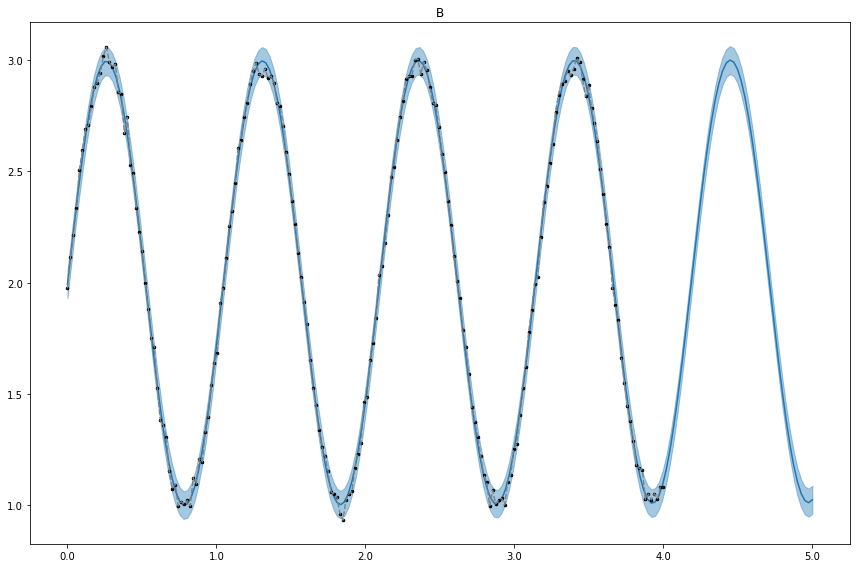

In [21]:
mosm2.predict(plot=True)

## SM-LMC

In [22]:
smlmc = mogptk.SM_LMC(data, Q=3, Rq=1)
smlmc.print_params()

,constant,mean,variance,noise
Q,,,,
0,[[0.23822333178453967]],[0.8802537072098056],[0.5322383152957253],NaN
1,[[0.8515553425751858]],[0.6990436921572767],[0.04211384031792287],NaN
2,[[-1.4902644223313226]],[0.49651626069388743],[0.7619657729223338],NaN
3,NaN,NaN,NaN,[0.9108226345268103]


In [27]:
smlmc.estimate_params(method='BNSE')
smlmc.print_params()

,constant,mean,variance,noise
Q,,,,
0,[[1.0]],[5.721513285946266],[0.2242244383422773],NaN
1,[[1.0]],[3.1577750922435674],[0.4742875528878782],NaN
2,[[1.0]],[2.0947616948546433],[0.1894199814103932],NaN
3,NaN,NaN,NaN,[0.016814740775803513]


In [28]:
smlmc.train()
smlmc.print_params()

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -394.751988
  Number of iterations: 65
  Number of functions evaluations: 93
Done in 0.0 minutes


,constant,mean,variance,noise
Q,,,,
0,[[0.7011069368204734]],[6.002074762321003],[1.000002860156556e-06],NaN
1,[[-9.383604412663444e-05]],[0.21029045770887872],[0.17522419462167182],NaN
2,[[1.801953669805699]],[1.0026836979269488e-06],[1.0349880638336022e-06],NaN
3,NaN,NaN,NaN,[0.0009294243477944133]


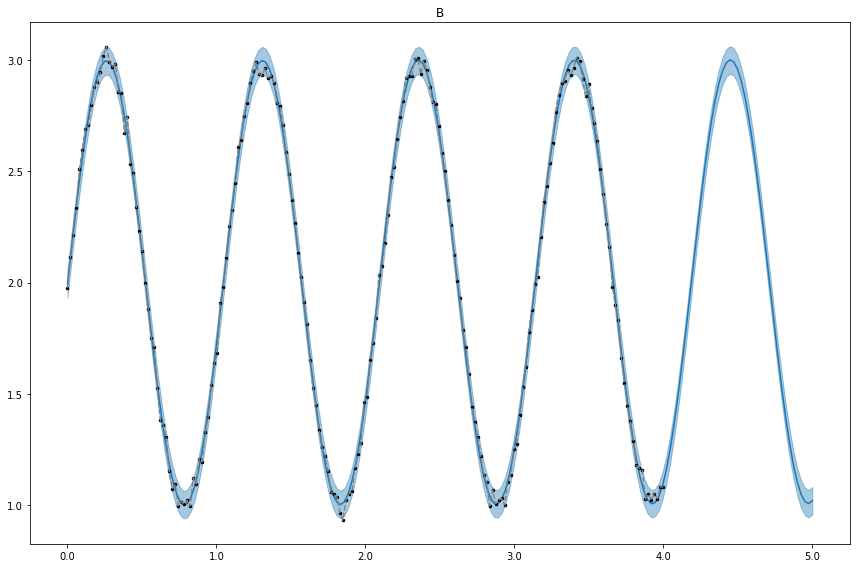

In [29]:
smlmc.predict(plot=True)

## CSM

In [30]:
csm = mogptk.CSM(data, Q=3, Rq=1)
csm.print_params()

,constant,mean,variance,phase,noise
Q,,,,,
0,[[0.47191732100197437]],[0.6439308775663625],[0.8728849336943779],[[0.0]],NaN
1,[[0.5863035250285568]],[0.6135946579731578],[0.8899394528478205],[[0.0]],NaN
2,[[0.4845563319441699]],[0.3776364487347925],[0.08089485647993311],[[0.0]],NaN
3,NaN,NaN,NaN,NaN,[0.3331818029629481]


In [34]:
csm.estimate_params(method='BNSE')
csm.print_params()

,constant,mean,variance,phase,noise
Q,,,,,
0,[[1.0]],[5.721513285946266],[0.5605610958556932],[[1.0000000002220446e-06]],NaN
1,[[1.0]],[3.1577750922435674],[1.1857188822196956],[[1.0000000002220446e-06]],NaN
2,[[1.0]],[2.0947616948546433],[0.473549953525983],[[1.0000000002220446e-06]],NaN
3,NaN,NaN,NaN,NaN,[0.0009397834786607151]


In [35]:
csm.train()
csm.print_params()

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -393.922561
  Number of iterations: 31
  Number of functions evaluations: 39
Done in 0.0 minutes


,constant,mean,variance,phase,noise
Q,,,,,
0,[[0.7768026943549929]],[6.002237652904239],[1.001189416564532e-06],[[1.0000000002220446e-06]],NaN
1,[[1.0033088900453716e-06]],[1.000684149181517e-06],[0.013712208578788855],[[1.0000000002220446e-06]],NaN
2,[[17.551973875992044]],[1.000000000051765e-06],[1.2588650991573606e-06],[[1.0000000002220446e-06]],NaN
3,NaN,NaN,NaN,NaN,[0.0009416673549357567]


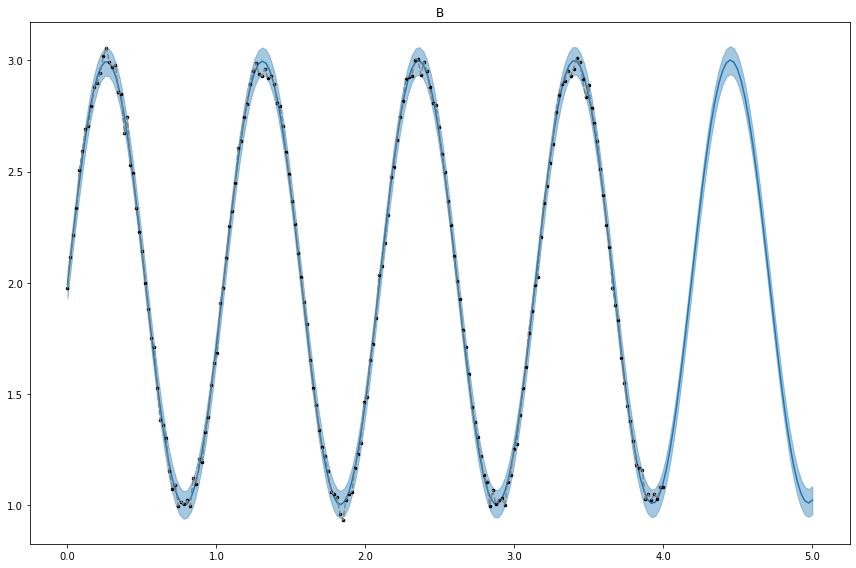

In [36]:
csm.predict(plot=True)

## CONV

In [37]:
conv = mogptk.CONV(data, Q=3)
conv.print_params()

,constant,variance,noise
Q,,,
0,[0.24831620708978108],[[0.0]],NaN
1,[0.6937256439361421],[[0.0]],NaN
2,[0.5556416436101331],[[0.0]],NaN
3,NaN,NaN,[0.9772800478162269]


In [38]:
conv.estimate_params(method='SM')
conv.print_params()

         Current function value: -341.018825
         Iterations: 66
         Function evaluations: 129
         Gradient evaluations: 118
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -341.018825
  Number of iterations: 66
  Number of functions evaluations: 129
Done in 0.0 minutes


,constant,variance,noise
Q,,,
0,[1.0],[[0.36180958729468693]],NaN
1,[1.0],[[3.5267626391890954e-06]],NaN
2,[1.0],[[131.77340565761173]],NaN
3,NaN,NaN,[0.016814740775803513]


In [39]:
conv.train(method='Adam')
conv.print_params()

Done in 0.1 minutes


,constant,variance,noise
Q,,,
0,[0.48689282349050345],[[0.16246302293817935]],NaN
1,[1.5972466844327469],[[1.7907251507055975e-06]],NaN
2,[0.5945723114504027],[[130.76054271998888]],NaN
3,NaN,NaN,[0.006490996039384699]


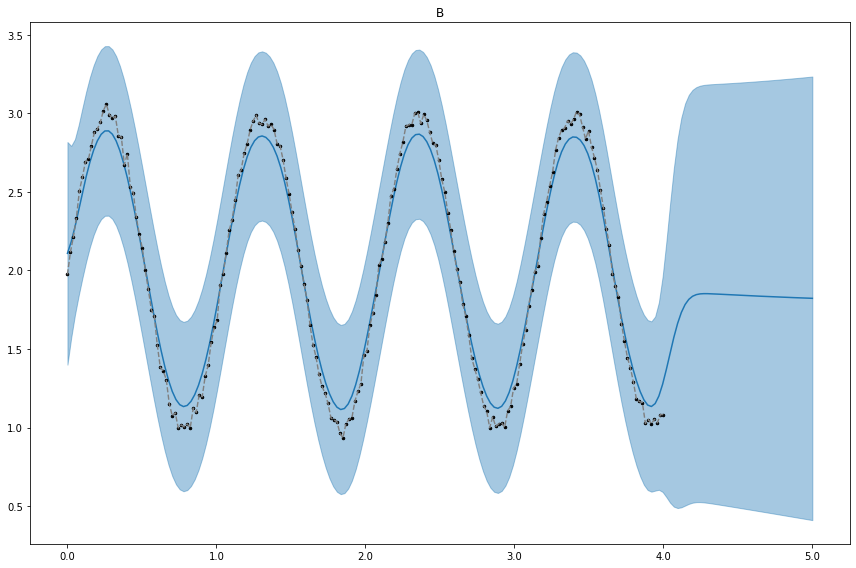

In [40]:
conv.predict(plot=True)